In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data
df = pd.read_excel('House Prices by Small Area - Sale Year.xlsx')

df.head()


,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,Docklands,Residential Apartment,487300.0,556
3,2000,East Melbourne,House/Townhouse,622500.0,42
4,2000,East Melbourne,Residential Apartment,295000.0,139


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape

(347, 5)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 5 columns):
Sale_Year            347 non-null int64
Small_Area           340 non-null object
Type                 347 non-null object
Median_Price         319 non-null float64
Transaction_Count    347 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 16.3+ KB


In [5]:
## See the variance

df.var()

Sale_Year            2.428923e+01
Median_Price         7.856055e+11
Transaction_Count    2.308045e+05
dtype: float64

In [6]:
## Check the stats
df.describe()

,Sale_Year,Median_Price,Transaction_Count
count,347.000000,3.190000e+02,347.000000
mean,2008.268012,6.612860e+05,277.051873
std,4.928411,8.863439e+05,480.421188
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.662810e+05,44.500000
50%,2008.000000,4.873000e+05,118.000000
75%,2013.000000,6.787500e+05,224.000000
max,2016.000000,1.430000e+07,3766.000000


In [7]:
## Find how many null values
df.isnull().sum()

Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64

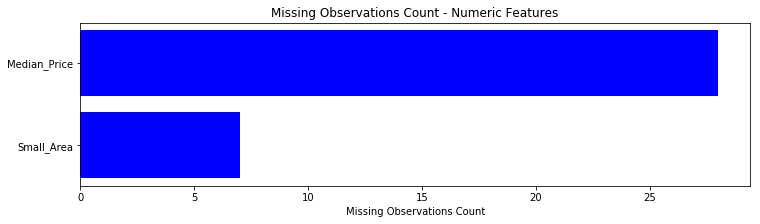

In [8]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

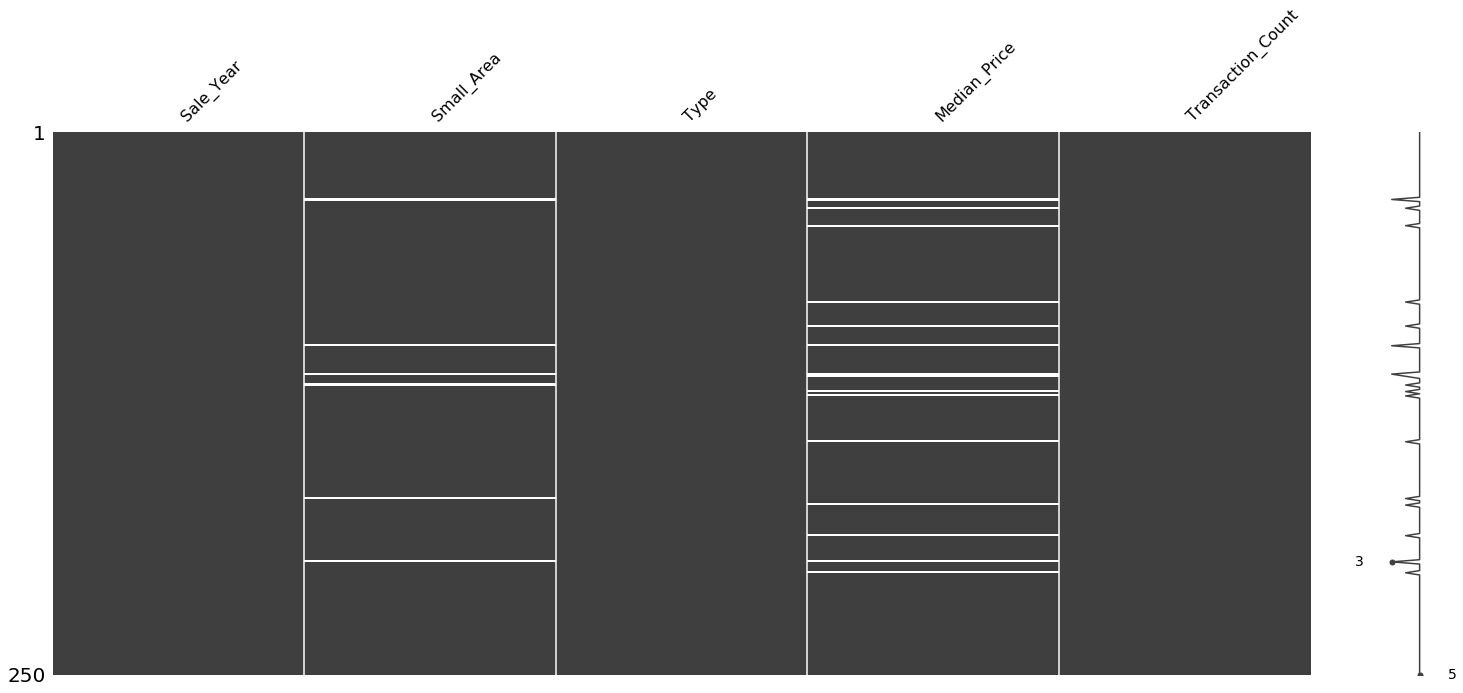

In [9]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [10]:
##Drop all nan's in the dataset at once

df.dropna(inplace=True)

df.shape


(316, 5)

In [11]:
## Find how many unique values
df.nunique()

Sale_Year             17
Small_Area            11
Type                   2
Median_Price         249
Transaction_Count    211
dtype: int64

In [12]:
## Find the unique values in a single column
df.Sale_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [13]:
df.Small_Area.unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [14]:
df.Type.unique()

array(['House/Townhouse', 'Residential Apartment'], dtype=object)

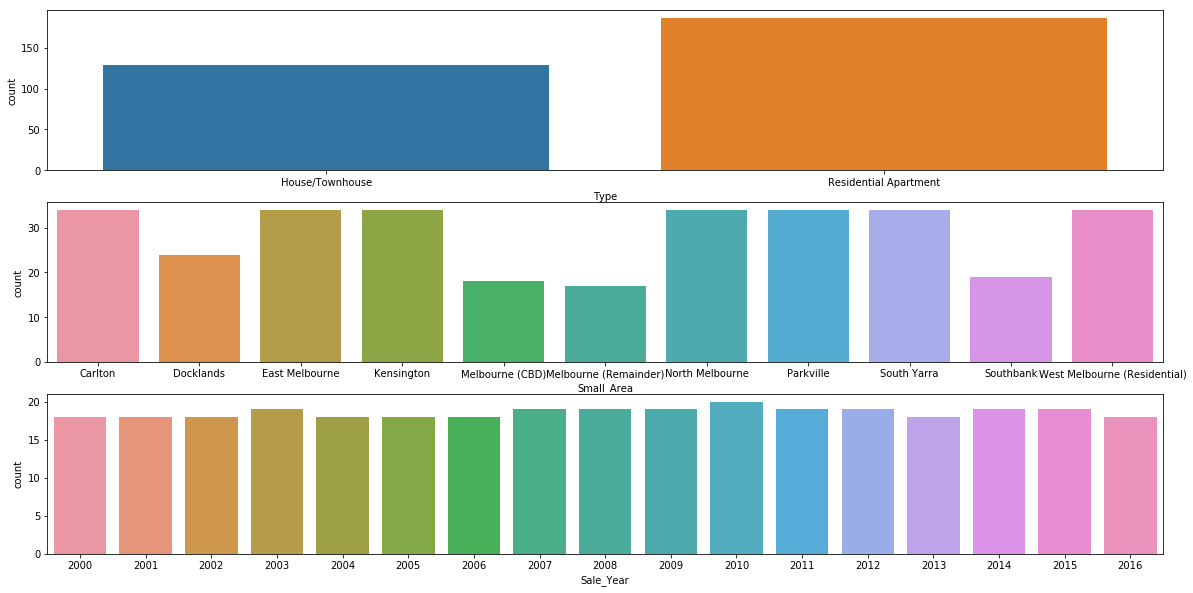

In [15]:
## Count plots

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
sns.countplot(df['Type'], ax=ax[0])
sns.countplot(df['Small_Area'], ax=ax[1])
sns.countplot(df['Sale_Year'], ax=ax[2])

### Outlier Alert...

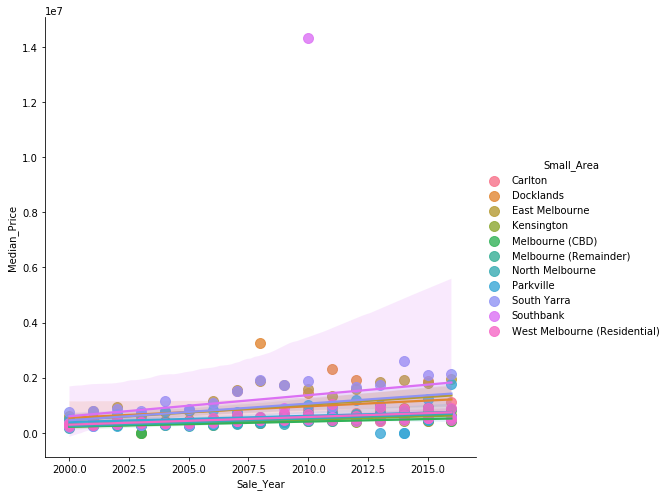

In [16]:
# Create lmplot
lm = sns.lmplot('Sale_Year', 'Median_Price', df, hue='Small_Area', size=7, truncate=True, scatter_kws={"s": 100})
plt.show()

In [17]:
# Function to remove outliers

def remove_outliers(data_frame, column_list, low=0.02, high=0.98):
    for column in column_list:
        this_column = data_frame[column]
        quant_df = this_column.quantile([low,high])
        low_limit = quant_df[low]
        high_limit = quant_df[high]
        data_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
    return data_frame

# Remove outlier

column_outlier = ['Median_Price']

df = remove_outliers(df, column_outlier)




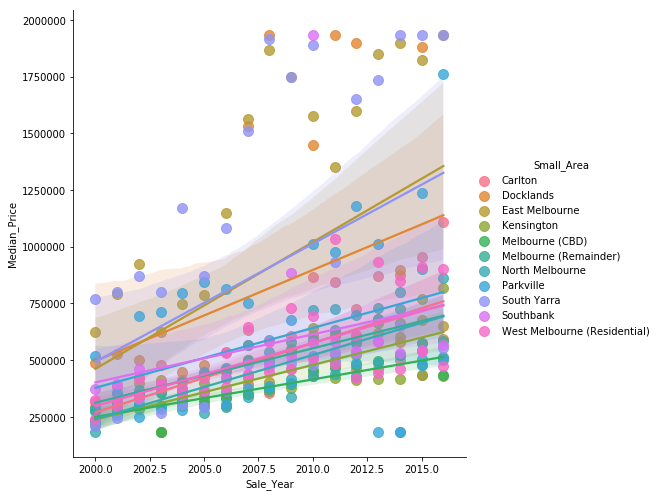

In [18]:
# Create lmplot
lm = sns.lmplot('Sale_Year', 'Median_Price', df, hue='Small_Area', size=7, truncate=True, scatter_kws={"s": 100})
plt.show()

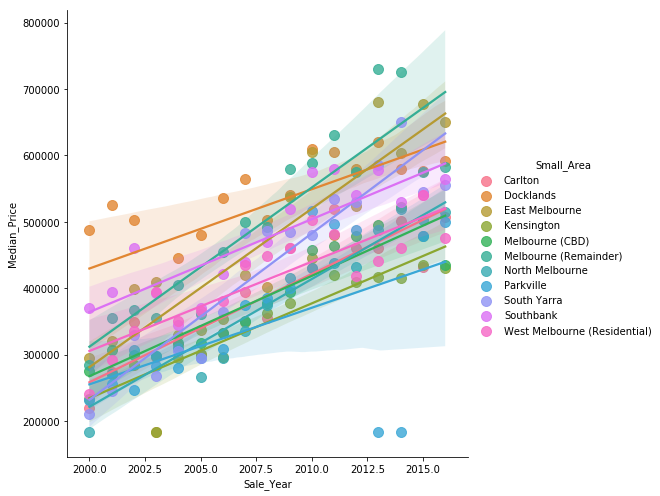

In [19]:
df_Apartments = df[df['Type']=="Residential Apartment"]
lm_aprt = sns.lmplot('Sale_Year', 'Median_Price', df_Apartments, hue='Small_Area', size=7, truncate=True, scatter_kws={"s": 100})
plt.show()

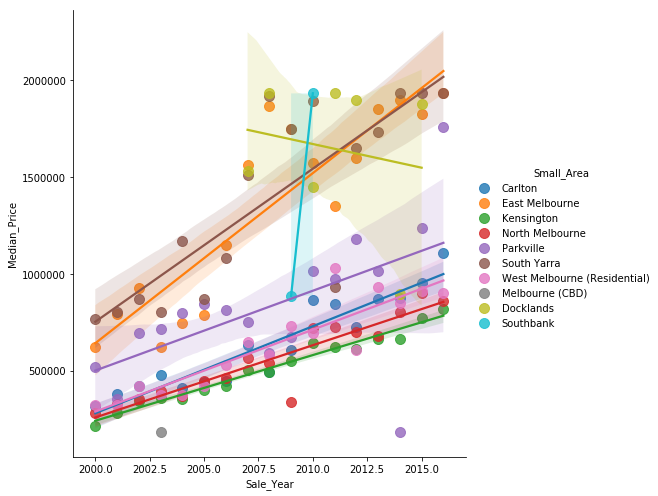

In [20]:
df_house = df[df['Type']=="House/Townhouse"]
lm_aprt = sns.lmplot('Sale_Year', 'Median_Price', df_house, hue='Small_Area', size=7, truncate=True, scatter_kws={"s": 100})
plt.show()

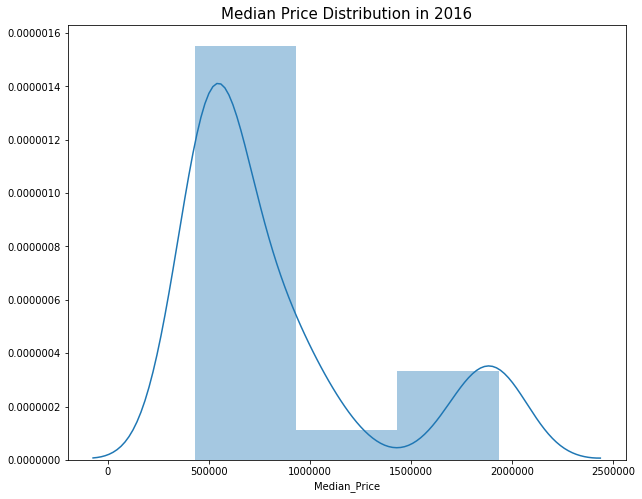

Highest median price in 2016: $1,933,250.00
Lowest median price in 2016: $430,000.00


In [21]:
## Put a condition in to observe the data closer
import locale
locale.setlocale(locale.LC_ALL, 'en_AU')

data = df.copy()
data = data[data['Sale_Year']==2016]
plt.figure(figsize=(10,8))
plt.title("Median Price Distribution in 2016",fontsize=15)
sns.distplot(data['Median_Price'], bins=3)
plt.show()

print("Highest median price in 2016:", locale.currency(data['Median_Price'].max(), grouping=True))
print("Lowest median price in 2016:", locale.currency(data['Median_Price'].min(), grouping=True))

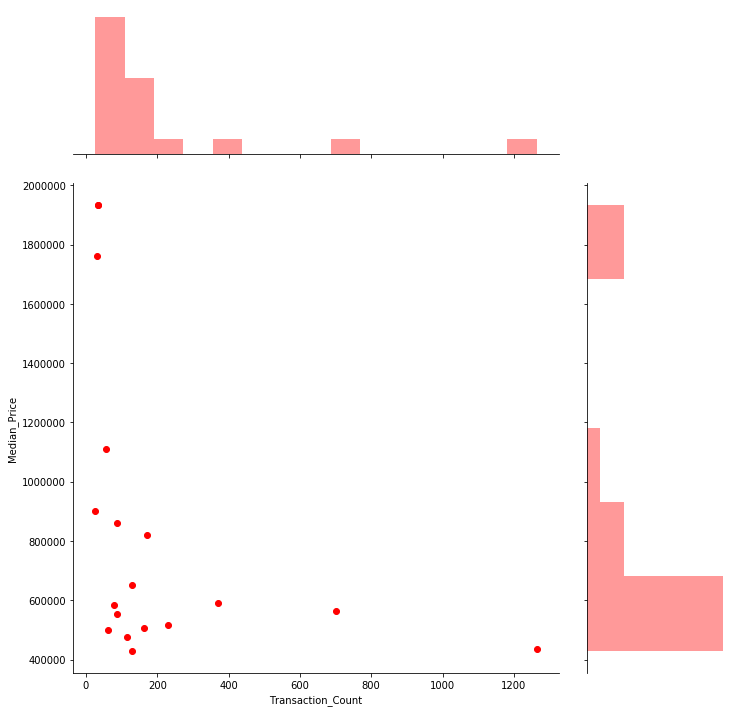

In [22]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="Transaction_Count", y="Median_Price", data=data, height=10, ratio=3, color="r")
plt.show()

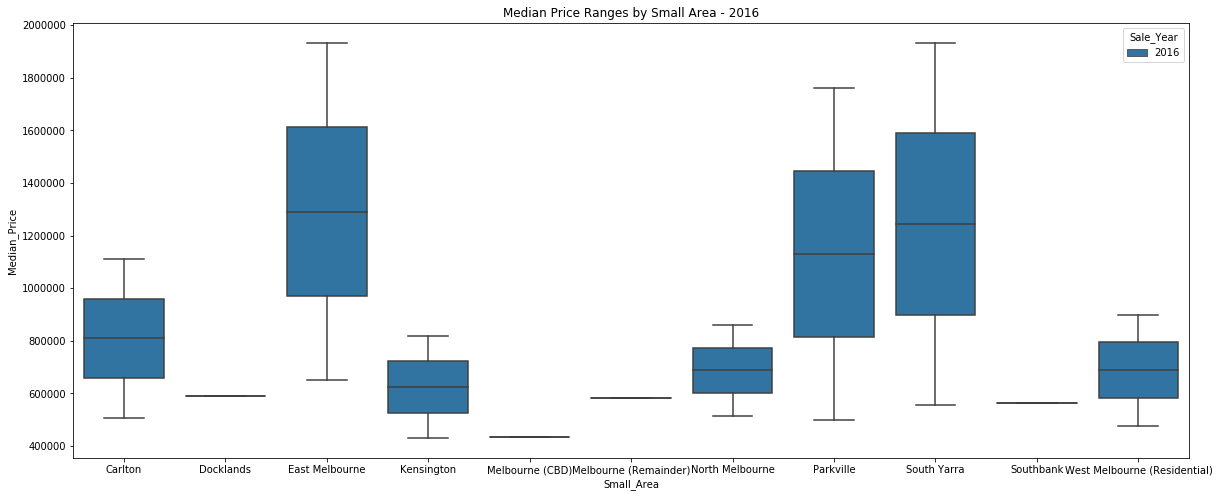

In [23]:
## Box plot

plt.figure(figsize=(20,8))
sns.boxplot(x="Small_Area", y="Median_Price", hue="Sale_Year", data=data)
plt.title('Median Price Ranges by Small Area - 2016')
plt.show()